# T1.1: MNIST

ssh -o ProxyCommand="ssh -g -L 8889:localhost:8889 s4451856@sshgw.leidenuniv.nl -q -W U0065090:22" -g -L 8889:localhost:8889 s4451856@U0065090

## mnist_cnn.py

In [ ]:
batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("Epochs")
plt.show()

## mnist_mlp.py


In [ ]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731169074.124477 2985350 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731169074.163651 2985350 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731169074.163743 2985350 cud

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


I0000 00:00:1731169074.995159 2985534 service.cc:146] XLA service 0x7f2594008590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731169074.995178 2985534 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-11-09 17:17:55.008761: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-09 17:17:55.051495: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-11-09 17:17:55.121858: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("Epochs")
plt.show()

# T1.2: Fashion MNIST

## (a) Multi-Layer Perceptron

In [25]:
os.environ["KERAS_BACKEND"] = "tensorflow"

fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

classNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


def MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 learnRate=0.0001,
                 hiddenLayers=1,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 optimiser="sgd",
                 epochs=20,
                 alpha=5):

  MLPModel = Sequential()
  MLPModel.add(keras.layers.Flatten(input_shape=[28, 28]))

  for i in range(hiddenLayers):
    MLPModel.add(keras.layers.Dense(300, activation=hiddenActivation))
    
    MLPModel.add(keras.layers.Dense(100, activation=hiddenActivation))


  MLPModel.add(keras.layers.Dense(10, activation=outputActivation))

  MLPModel.compile(loss="sparse_categorical_crossentropy",
  optimizer=optimiser(learning_rate=learnRate),
  metrics=["accuracy"])

  history = MLPModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.xlabel("Epochs")
  plt.show()

  test_loss, test_acc = MLPModel.evaluate(xTest,  yTest, verbose=2)
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc

In [ ]:
results = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                       learnRate= 0.001,
                       hiddenLayers=1,
                       optimiser=optimizers.Adam,
                       outputActivation="softplus",
                       hiddenActivation="tanh",
                       epochs=30)

print(results)

## (b) Convolutional Neural Network

In [ ]:
def CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 learnRate=0.0001,
                 hiddenLayers=1,
                 layerWidth=64,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 convActivation="relu",
                 optimiser=keras.optimizers.SGD,
                 epochs=50,
                 alpha=5,
                 inputShape=(28, 28, 1),
                 outputShape=10,
                 lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):

  CNNModel = Sequential()
  CNNModel.add(Conv2D(32, (3, 3), activation=convActivation, input_shape=inputShape))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(128, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(256, (3, 3), activation=convActivation))

  CNNModel.add(Flatten())

  for i in range(hiddenLayers):
    CNNModel.add(Dense(layerWidth, activation=hiddenActivation))

  # CNNModel.add(Dense(640, activation=hiddenActivation))

  CNNModel.add(Dense(outputShape, activation=outputActivation))

  CNNModel.compile(optimizer=optimiser(learning_rate=learnRate),
                loss=lossFunction,
                metrics=['accuracy'])

  #CNNModel.summary()
  history = CNNModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))
  
  print(history.history)

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.xlabel("Epochs")
  plt.show()

  #print(CNNModel.predict(xVal))

  val_loss, val_acc = CNNModel.evaluate(xVal,  yVal, verbose=2)
  test_loss, test_acc = CNNModel.evaluate(xTest,  yTest, verbose=2)

  print(f"Learning Rate: {learnRate}")
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Layer Width: {layerWidth}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Conv Activation: {convActivation}")
  #print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Validation loss: {val_loss}")
  print(f"Validation accuracy: {val_acc}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc, val_acc

In [ ]:
results = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                       learnRate=0.001,
                       hiddenLayers=2,
                       optimiser=optimizers.Adamax,
                       outputActivation="elu",
                       hiddenActivation="sigmoid",
                       convActivation="relu",
                       epochs=30)

print(results)

In [4]:
def eval(model, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=False,
         learnRate=0.01,
        hiddenLayers=6,
        layerWidth=256,
        outputActivation="elu",
        hiddenActivation="elu",
        convActivation="relu",
        epochs=200,
        optimiser=keras.optimizers.Adagrad,
        inputShape=(75, 75, 1),
        outputShape=720,
        lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):
    
    # LearnRate
    bestLearnRate = (0.01, 0, 0)
    #for learnRate in [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=lossFunction,
    #                              learnRate=learnRate)

    #    if val_acc > bestLearnRate[2]:
    #        bestLearnRate = (learnRate, test_acc, val_acc)

    #    elif val_acc < bestLearnRate[2] - 0.1:
    #        break


    #bestLoss = (circularLoss, 0, 0)
    #for loss in [circularLoss,
    #                keras.losses.MeanSquaredError,
    #                keras.losses.MeanAbsoluteError,
    #                keras.losses.MeanSquaredLogarithmicError,
    #                keras.losses.MeanAbsolutePercentageError,
    #                keras.losses.CosineSimilarity,
    #                keras.losses.Huber,
    #                keras.losses.LogCosh,
    #                keras.losses.Tversky,
    #                keras.losses.Dice]:
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=loss,
    #                              learnRate=bestLearnRate[0],
    #                            epochs=100)

    #    if val_acc > bestLoss[2]:
    #        bestLoss = (loss, test_acc, val_acc)

    
    # Epochs
    bestEpochs = (150, 0, 0)
    #for epochs in range(25, 250, 25):
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=lossFunction,
    #                              learnRate=learnRate,
    #                              hiddenLayers=hiddenLayers,
    #                              layerWidth=layerWidth,
    #                              outputActivation=outputActivation,
    #                              hiddenActivation=hiddenActivation,
    #                              convActivation=convActivation,
    #                              epochs=epochs,
    #                              optimiser=optimiser)

    #    if val_acc > bestEpochs[2]:
    #       bestEpochs = (epochs, test_acc, val_acc)

    #    else:
    #        break

        #elif val_acc < bestEpochs[2] - 0.1:
        #    break


    # Optimiser
    bestOptimiser = (keras.optimizers.Adagrad, 0, 0)
    #for optimiser in [keras.optimizers.SGD,
    #                keras.optimizers.RMSprop,
    #                keras.optimizers.Adam,
    #                keras.optimizers.AdamW,
    #                keras.optimizers.Adadelta,
    #                keras.optimizers.Adagrad,
    #                keras.optimizers.Adamax,
    #                keras.optimizers.Adafactor,
    #                keras.optimizers.Nadam,
    #                keras.optimizers.Ftrl,
    #                keras.optimizers.Lion]:
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=lossFunction,
    #                              learnRate=learnRate,
    #                              hiddenLayers=hiddenLayers,
    #                              layerWidth=layerWidth,
    #                              outputActivation=outputActivation,
    #                              hiddenActivation=hiddenActivation,
    #                              convActivation=convActivation,
    #                              epochs=bestEpochs[0],
    #                              optimiser=optimiser)

    #    if val_acc > bestOptimiser[2]:
    #        bestOptimiser = (optimiser, test_acc, val_acc)


    # Output activation function
    bestOutActivation = ("selu", 0, 0)
    #for outputActivation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
    #                "tanh", "selu", "elu", "exponential"]:
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=lossFunction,
    #                              learnRate=learnRate,
    #                              hiddenLayers=hiddenLayers,
    #                              layerWidth=layerWidth,
    #                              outputActivation=outputActivation,
    #                              hiddenActivation=hiddenActivation,
    #                              convActivation=convActivation,
    #                              epochs=bestEpochs[0],
    #                              optimiser=bestOptimiser[0])

    #    if val_acc > bestOutActivation[2]:
    #        bestOutActivation = (outputActivation, test_acc, val_acc)


    # Hidden Layer activation function
    bestHiddenActivation = ("softsign", 0, 0)
    #for hiddenActivation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
    #                "tanh", "selu", "elu", "exponential"]:
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                              lossFunction=lossFunction,
    #                              learnRate=learnRate,
    #                              hiddenLayers=hiddenLayers,
    #                              layerWidth=layerWidth,
    #                              outputActivation=bestOutActivation[0],
    #                              hiddenActivation=hiddenActivation,
    #                              convActivation=convActivation,
    #                              epochs=bestEpochs[0],
    #                              optimiser=bestOptimiser[0])

    #    if val_acc > bestHiddenActivation[2]:
    #        bestHiddenActivation = (hiddenActivation, test_acc, val_acc)

    
    # Convolutional layer Activation Function
    bestConvActivation = ("relu", 0, 0)
    #if CNN:
    #    for convActivation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
    #                    "tanh", "selu", "elu", "exponential"]:
    #        test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                                         inputShape=inputShape, outputShape=outputShape,
    #                                         lossFunction=lossFunction,
    #                                        learnRate=learnRate,
    #                                        hiddenLayers=hiddenLayers,
    #                                        layerWidth=layerWidth,
    #                                        outputActivation=bestOutActivation[0],
    #                                        hiddenActivation=bestHiddenActivation[0],
    #                                        convActivation=convActivation,
    #                                        epochs=bestEpochs[0],
    #                                        optimiser=bestOptimiser[0])

    #        if val_acc > bestConvActivation[2]:
    #            bestConvActivation = (convActivation, test_acc, val_acc)

    
    # Hidden Layers
    bestHidden = (6, 0, 0)
    #for hiddenLayers in range(1, 50):
    #    test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                              inputShape=inputShape, outputShape=outputShape,
    #                            lossFunction=lossFunction,
    #                            learnRate=learnRate,
    #                            hiddenLayers=hiddenLayers,
    #                            layerWidth=layerWidth,
    #                            outputActivation=bestOutActivation[0],
    #                            hiddenActivation=bestHiddenActivation[0],
    #                            convActivation=bestConvActivation[0],
    #                            epochs=bestEpochs[0],
    #                            optimiser=bestOptimiser[0])

    #    if val_acc > bestHidden[2]:
    #        bestHidden = (hiddenLayers, test_acc, val_acc)

    #    elif val_acc < bestHidden[2] - 0.1:
    #        break

    
    # Hidden Layers
    bestWidth = (352, 0, 0)
    accuracyList = []
    for layerWidth in range(344, 360, 2):
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                lossFunction=lossFunction,
                                learnRate=learnRate,
                                hiddenLayers=bestHidden[0],
                                layerWidth=layerWidth,
                                outputActivation=bestOutActivation[0],
                                hiddenActivation=bestHiddenActivation[0],
                                convActivation=bestConvActivation[0],
                                epochs=bestEpochs[0],
                                optimiser=bestOptimiser[0])
    
        accuracyList.append(val_acc)

        if val_acc > bestWidth[2]:
            bestWidth = (layerWidth, test_acc, val_acc)

        #elif val_acc < bestWidth[2] - 0.1:
        #    break


    # Regularisations
    bestAlpha = (0, 0, 0)
    #alphas = np.logspace(-10, -2, 200)
    #for alpha in alphas:
    #  test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                          hiddenLayers=bestHidden[0],
    #                          outputActivation=bestOutActivation[0],
    #                          hiddenActivation=bestHiddenActivation[0],
    #                          epochs=bestEpochs[0],
    #                          optimiser=bestOptimiser[0],
    #                          alpha=alpha)

    #  if accuracy > bestAlpha[2]:
    #   bestAlpha = (alpha, accuracy)

    print(f"Best Learning Rate: {bestLearnRate[0]}")
    print(f"Best Hidden layers: {bestHidden[0]}")
    print(f"Best Width: {bestWidth[0]}")
    print(f"Best Optimiser: {bestOptimiser[0]}")
    print(f"Best Output Activation: {bestOutActivation[0]}")
    print(f"Best Hidden Activation: {bestHiddenActivation[0]}")
    print(f"Best Conv Activation: {bestConvActivation[0]}")
    print(f"Best Epochs: {bestEpochs[0]}")
    print(f"Final Val accuracy: {bestHidden[2]}")
    print(f"Final Test accuracy: {bestHidden[1]}")

    plt.figure()
    plt.plot(accuracyList, range(len(accuracyList)))
    plt.show()

    return {"bestHidden": bestHidden[0], "bestOptimiser": bestOptimiser[0],
            "bestOutActivation": bestOutActivation[0],
            "bestHiddenActivation": bestOutActivation[0],
            "bestEpochs": bestEpochs[0]}

## Experimentation and Evaluation

### MLP Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 1

Optimiser: Adam

Output Activation: SoftPlus

Hidden Activation: Tanh

Alpha:  5

Epochs: 30

Test accuracy: 0.8705999851226807

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

# MLP model eval
bestSettings = eval(MLPModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest)
print(bestSettings)

### CNN Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 2

Optimiser: Adamax

Output Activation: elu

Hidden Activation: sigmoid

Conv Activation: relu

Epochs: 30

Test loss: 0.3733844459056854

Test accuracy: 0.8733000159263611

In [ ]:
# CNN model eval
bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=True)
print(bestSettings)

### CIFAR-10

In [ ]:
cifar = keras.datasets.cifar10
(xTrainFull, yTrainFull), (xTest, yTest) = cifar.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

In [ ]:
#Hidden layers: 2
#Optimiser: Adamax
#Output Activation: elu
#Hidden Activation: sigmoid
#Conv Activation: relu
#Epochs: 30
#Test loss: 0.3733844459056854
#Test accuracy: 0.8733000159263611

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                            learnRate=0.001,
                          hiddenLayers=2,
                          outputActivation="elu",
                          hiddenActivation="sigmoid",
                          convActivation="relu",
                          epochs=30,
                          optimiser=keras.optimizers.Adamax,
                          inputShape=(32, 32, 3))

print(test_acc, val_acc)

# T2.1 Tell-the-time Network

## (a) Classification

24 Classes

In [ ]:
def ClassCNN(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 learnRate=0.0001,
                 hiddenLayers=1,
                 layerWidth=64,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 convActivation="relu",
                 optimiser=keras.optimizers.SGD,
                 epochs=50,
                 alpha=5,
                 inputShape=(28, 28, 1),
                 outputShape=10,
                 lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):

  CNNModel = Sequential()
  CNNModel.add(Conv2D(32, (3, 3), activation=convActivation, input_shape=inputShape))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(128, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(256, (3, 3), activation=convActivation))

  CNNModel.add(Flatten())

  for i in range(hiddenLayers):
    CNNModel.add(Dense(layerWidth, activation=hiddenActivation))

  CNNModel.add(Dense(outputShape, activation=outputActivation))

  CNNModel.compile(optimizer=optimiser(learning_rate=learnRate),
                loss=lossFunction,
                metrics=['accuracy'])

  #CNNModel.summary()
  history = CNNModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))
  
  print(history.history)

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.xlabel("Epochs")
  plt.show()

  #print(CNNModel.predict(xVal))

  val_loss, val_acc = CNNModel.evaluate(xVal,  yVal, verbose=2)
  test_loss, test_acc = CNNModel.evaluate(xTest,  yTest, verbose=2)

  print(f"Learning Rate: {learnRate}")
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Layer Width: {layerWidth}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Conv Activation: {convActivation}")
  #print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Validation loss: {val_loss}")
  print(f"Validation accuracy: {val_acc}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc, val_acc

In [ ]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int(time[0] + (time[1] // 30)) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = ClassCNN(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                 learnRate=0.001,
                                hiddenLayers=2,
                                outputActivation="softmax",
                                hiddenActivation="relu",
                                convActivation="relu",
                                epochs=30,
                                optimiser=keras.optimizers.Adam,
                                inputShape=(75, 75, 1),
                                outputShape=24)

print(test_acc, val_acc)

720 Classes

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 6.8069e-04 - loss: 6.5831 - val_accuracy: 0.0017 - val_loss: 6.5837
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 9.0682e-04 - loss: 6.5805 - val_accuracy: 0.0000e+00 - val_loss: 6.5874
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0019 - loss: 6.5796 - val_accuracy: 0.0000e+00 - val_loss: 6.5897
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0015 - loss: 6.5782 - val_accuracy: 0.0011 - val_loss: 6.5915
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0014 - loss: 6.5781 - val_accuracy: 0.0000e+00 - val_loss: 6.5938
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0014 - loss: 6.5777 - val_accuracy: 0.0000e+00 - val_loss: 6.5958
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0018 - loss: 6.5774 - val_accuracy: 0.0000e+00 - val_loss: 6.5967
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.00

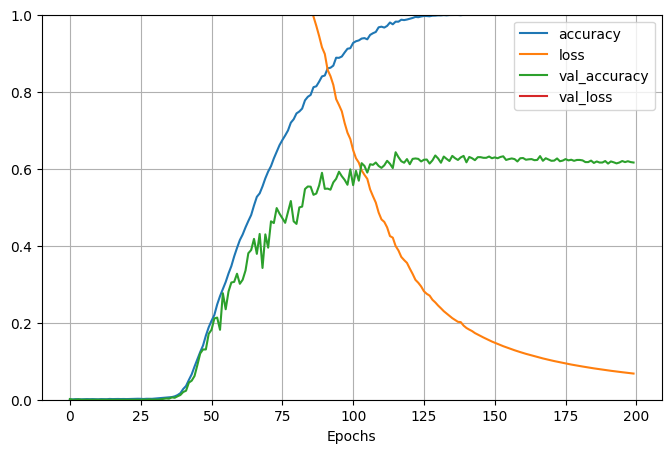

57/57 - 0s - 981us/step - accuracy: 0.6161 - loss: 1.2988
57/57 - 0s - 969us/step - accuracy: 0.6439 - loss: 1.2016
Learning Rate: 0.01
Hidden layers: 6
Layer Width: 346
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: selu
Hidden Activation: softsign
Conv Activation: relu
Epochs: 200
Validation loss: 1.2987993955612183
Validation accuracy: 0.6161110997200012
Test loss: 1.201573371887207
Test accuracy: 0.6438888907432556
0.6438888907432556 0.6161110997200012


In [7]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int((time[0] * 60) + time[1]) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = ClassCNN(xTrain, yTrain, xVal, yVal, xTest, yTest,
                         learnRate=0.01,
                         hiddenLayers=6,
                         layerWidth=346,
                         outputActivation="selu",
                         hiddenActivation="softsign",
                         convActivation="relu",
                         epochs=200,
                         optimiser=keras.optimizers.Adagrad,
                         inputShape=(75, 75, 1),
                         outputShape=720)

print(test_acc, val_acc)

#bestSettings = eval(ClassCNN, xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          learnRate=0.01,
#                          hiddenLayers=6,
#                          layerWidth=512,
#                          outputActivation="elu",
#                          hiddenActivation="elu",
#                          convActivation="relu",
#                          epochs=200,
#                          optimiser=keras.optimizers.Adagrad,
#                          inputShape=(75, 75, 1),
#                          outputShape=720,
#                          lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True))

#print(bestSettings)

## (b) Regression

In [12]:
def RegressionCNN(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 learnRate=0.0001,
                 hiddenLayers=1,
                 layerWidth=64,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 convActivation="relu",
                 optimiser=keras.optimizers.SGD,
                 epochs=50,
                 alpha=5,
                 inputShape=(28, 28, 1),
                 outputShape=10,
                 lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):

  CNNModel = Sequential()
  CNNModel.add(Conv2D(32, (3, 3), activation=convActivation, input_shape=inputShape))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(16, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(8, (3, 3), activation=convActivation))

  CNNModel.add(Flatten())

  for i in range(hiddenLayers):
    CNNModel.add(Dense(layerWidth, activation=hiddenActivation))

  CNNModel.add(Dense(4, activation=hiddenActivation))

  CNNModel.add(Dense(outputShape, activation=outputActivation))

  CNNModel.compile(optimizer=optimiser(learning_rate=learnRate),
                loss=lossFunction,
                metrics=['accuracy'])

  #CNNModel.summary()
  history = CNNModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))
  
  print(history.history)

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.xlabel("Epochs")
  plt.show()

  #print(CNNModel.predict(xVal))

  val_loss, val_acc = CNNModel.evaluate(xVal,  yVal, verbose=2)
  test_loss, test_acc = CNNModel.evaluate(xTest,  yTest, verbose=2)

  print(f"Learning Rate: {learnRate}")
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Layer Width: {layerWidth}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Conv Activation: {convActivation}")
  #print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Validation loss: {val_loss}")
  print(f"Validation accuracy: {val_acc}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc, val_acc

In [9]:
class circularLoss(Loss):
    def call(self, y_true, y_pred):
        return tf.reduce_mean(tf.abs(tf.atan2(tf.sin(y_true - y_pred), tf.cos(y_true - y_pred))))

In [15]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([float(time[0] + (time[1] / 60)) for time in ySmallClock])

print(xSmallClock)
print(ySmallClock)

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0
    
xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = RegressionCNN(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                 learnRate=0.001,
                                hiddenLayers=2,
                                layerWidth=8,
                                outputActivation="selu",
                                hiddenActivation="softsign",
                                convActivation="relu",
                                epochs=125,
                                optimiser=keras.optimizers.Adam,
                                inputShape=(75, 75, 1),
                                outputShape=1,
                                lossFunction=circularLoss)

print(test_acc, val_acc)

#bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=True,
#                    inputShape=(75, 75, 1), outputShape=1, lossFunction=circularLoss)
#print(bestSettings)

[[[130 134 141 ... 147 143 146]
  [142 136 122 ... 150 151 153]
  [140 129 143 ... 141 141 145]
  ...
  [135 111  74 ... 106 130 135]
  [ 81 100 109 ... 129 104 132]
  [ 92 123 120 ... 103  84  80]]

 [[138 155 148 ... 136 136 128]
  [138 142 138 ... 126 121 134]
  [125 143 143 ... 130 139 135]
  ...
  [101  79  65 ...  94  98  98]
  [ 75  70  84 ...  95 100  90]
  [ 80 104 107 ...  96 103  91]]

 [[137 131 148 ... 153 157 157]
  [145 142 141 ... 150 153 153]
  [139 143 146 ... 149 148 145]
  ...
  [ 97 114 121 ...  91 101 104]
  [121 121 100 ... 100  85  76]
  [134 132 112 ...  95  97  95]]

 ...

 [[128 124 133 ... 146 147 148]
  [141 144 149 ... 152 152 152]
  [132 126 125 ... 147 149 148]
  ...
  [ 61  73  94 ...  91 100 105]
  [135 118  96 ... 129 122 137]
  [ 55  64  86 ... 136 108 146]]

 [[133 142 144 ... 101 104  89]
  [118 127 132 ...  94 105 104]
  [133 128 137 ... 104  99 113]
  ...
  [135  95  76 ...  64  81  68]
  [149  95  77 ...  74  62  56]
  [126  89  81 ...  98  86  

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/125
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0014 - loss: 1.5913 - val_accuracy: 0.0017 - val_loss: 1.5445
Epoch 2/125
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0011 - loss: 1.5405 - val_accuracy: 0.0017 - val_loss: 1.5226
Epoch 3/125
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0011 - loss: 1.4867 - val_accuracy: 0.0017 - val_loss: 1.5226
Epoch 4/125
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0012 - loss: 1.5135 - val_accuracy: 0.0017 - val_loss: 1.5232
Epoch 5/125
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 9.6638e-04 - loss: 1.4864 - val_accuracy: 0.0017 - val_loss: 1.5232
Epoch 6/125
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0015 - loss: 1.5104 - val_accuracy: 0.0017 - val_loss: 1.5227
Epoch 7/125
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0013 - loss: 1.4986 - val_accuracy: 0.0017 - val_loss: 1.5227
Epoch 8/125
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0015 - loss: 1.5033 - val_

KeyboardInterrupt: 